## Feature engineering from twitter data

#### We scraped for the hashatg - #SOTU and were able to successfully scrape 600 tweets.

In [1]:
import pandas as pd
import re
%matplotlib inline

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("tweets_with_hashtag_SOTU.csv")
df.head()

,Unnamed: 0,ids,retweet,favorite,inreplyto,friends,screen_name,followers,listed,text,location
0,0,897500703869911042,3,0,NaN,6307,Outsider__14,5857,21,RT @Geebsvega: @spicleangelo @Rampage95_ We ha...,NaN
1,1,47368876,11,0,NaN,147,Doug_Bandow,4686,202,RT @JimBovard: Trump in his #SOTU said US does...,Washington DC
2,2,1258428798,15,0,NaN,4789,GAdevoted,3959,16,RT @USRepKCastor: #SOTU https://t.co/x0t5Q1QOfp,usa : gadevoted.tumblr.com
3,3,4193942273,849,0,NaN,4647,lynmacjay,6118,88,RT @BrentBozell: Speaker Pelosi invited the pr...,"Tennessee, USA"
4,4,3425396188,5315,0,NaN,159,doceansec,121,0,RT @FrankLuntz: These numbers are especially g...,"New Mexico, USA"


In [3]:
def get_mentioned_user(y):
    print(re.split(r'\s@(\w+):',y))
    return(0)

In [4]:
def get_mentions_sent(y):
    if len(y)>0:
        return(len(y)-1)
    else:
        return(0)

In [5]:
df['retweeted_user']=df.text.apply(lambda x:re.findall(r'\s@(\w+):',x))
df['mentioned_user']= df.text.apply(lambda x:re.findall(r'\s@(\w+)',x))
df['mentions_sent'] = df.mentioned_user.apply(get_mentions_sent)
df['retweets_sent'] = df.retweeted_user.apply(lambda x: len(x))
df['retweeted_user']=df.text.apply(lambda x:''.join(re.findall(r'\s@(\w+):',x)))

In [6]:
df.head()

,Unnamed: 0,ids,retweet,favorite,inreplyto,friends,screen_name,followers,listed,text,location,retweeted_user,mentioned_user,mentions_sent,retweets_sent
0,0,897500703869911042,3,0,NaN,6307,Outsider__14,5857,21,RT @Geebsvega: @spicleangelo @Rampage95_ We ha...,NaN,Geebsvega,"[Geebsvega, spicleangelo, Rampage95_]",2,1
1,1,47368876,11,0,NaN,147,Doug_Bandow,4686,202,RT @JimBovard: Trump in his #SOTU said US does...,Washington DC,JimBovard,[JimBovard],0,1
2,2,1258428798,15,0,NaN,4789,GAdevoted,3959,16,RT @USRepKCastor: #SOTU https://t.co/x0t5Q1QOfp,usa : gadevoted.tumblr.com,USRepKCastor,[USRepKCastor],0,1
3,3,4193942273,849,0,NaN,4647,lynmacjay,6118,88,RT @BrentBozell: Speaker Pelosi invited the pr...,"Tennessee, USA",BrentBozell,[BrentBozell],0,1
4,4,3425396188,5315,0,NaN,159,doceansec,121,0,RT @FrankLuntz: These numbers are especially g...,"New Mexico, USA",FrankLuntz,[FrankLuntz],0,1


In [24]:
def get_content_type(y):
    if len(y)>0:
        return('RT')
    else:
        return('Tweet')

In [27]:
df2 = df[['screen_name','retweeted_user']]
df2['content_type'] = df2.retweeted_user.apply(get_content_type)
df2.head()
df2.to_csv("part2.csv",index =False)

## Creating Network Features

In [7]:
df3 = df.sort_values(by=['screen_name'])

In [8]:
df3['edge_value'] = 1

In [9]:
df3.head()

,Unnamed: 0,ids,retweet,favorite,inreplyto,friends,screen_name,followers,listed,text,location,retweeted_user,mentioned_user,mentions_sent,retweets_sent,edge_value
4651,4651,16455190,6483,0,NaN,1921,000gearz,711,7,RT @TeaPainUSA: 1. Another sealed indictment t...,NaN,TeaPainUSA,[TeaPainUSA],0,1,1
2069,2069,1023417738864279553,5,0,NaN,2713,010_10_101,2770,4,RT @ProgShadow: #Gaslighting #SOTU #AbramsAddr...,NaN,ProgShadow,[ProgShadow],0,1,1
2054,2054,1023417738864279553,36,0,NaN,2713,010_10_101,2770,4,RT @NYforSanders: (1/3) Fake News Alert:\r\n\r...,NaN,NYforSanders,[NYforSanders],0,1,1
4846,4846,1422073436,13648,0,NaN,79,0pTic_Lamp,13,0,RT @FLOTUS: It was an honor to be joined by ou...,"Texas, USA",FLOTUS,[FLOTUS],0,1,1
4611,4611,1634485886,239,0,NaN,26,0ssus,28,3,RT @_SemaHernandez_: When you see the unity ag...,Corvallis,_SemaHernandez_,[_SemaHernandez_],0,1,1


In [10]:
g = nx.from_pandas_edgelist(df3, source='screen_name', target='retweeted_user',edge_attr = 'edge_value',create_using=nx.DiGraph())
#g = nx.DiGraph()
#nx.draw(g)

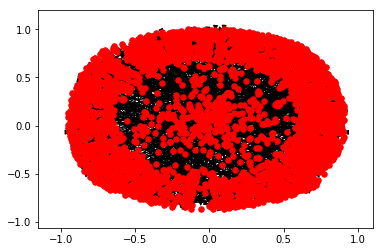

In [28]:
nx.draw_networkx(g,with_labels = False, node_size = 30,pos=nx.spring_layout(g))

In [15]:
degree = pd.DataFrame(nx.degree_centrality(g),index=['degree']).T.reset_index()
closeness = pd.DataFrame(nx.closeness_centrality(g),index=['closeness']).T.reset_index()
betweenness = pd.DataFrame(nx.betweenness_centrality(g),index=['betweenness']).T.reset_index()

In [16]:
#merging the dataset for scoring
df_m1 = df3.groupby(['screen_name'])['mentions_sent','retweets_sent'].sum()
df_m2 = df3.drop_duplicates(['screen_name'])[['screen_name','followers']]
df_m3 = pd.merge(df_m1,df_m2,how='inner',on='screen_name')

In [17]:
measures = degree.merge(closeness,on='index').merge(betweenness,on='index')
df_m4 = pd.merge(df_m3,measures,how='inner',left_on='screen_name',right_on = 'index')
df_m4.head()

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness
0,000gearz,0,1,711,000gearz,0.000177,0.0,0.0
1,010_10_101,0,2,2770,010_10_101,0.000355,0.0,0.0
2,0pTic_Lamp,0,1,13,0pTic_Lamp,0.000177,0.0,0.0
3,0ssus,0,1,28,0ssus,0.000177,0.0,0.0
4,104thSpringer,0,1,109,104thSpringer,0.000177,0.0,0.0


In [18]:
#creating score by using standardized estimates from 
df_m4['score'] = 0.351708942 * df_m4['followers'] + 0.114742565 * df_m4['mentions_sent'] + 0.195037766 * df_m4['retweets_sent'] 
+ 0.240115142 * df_m4['betweenness'] + 0.098395585 * df_m4['closeness']
df_m4.head()

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
0,000gearz,0,1,711,000gearz,0.000177,0.0,0.0,250.260096
1,010_10_101,0,2,2770,010_10_101,0.000355,0.0,0.0,974.623845
2,0pTic_Lamp,0,1,13,0pTic_Lamp,0.000177,0.0,0.0,4.767254
3,0ssus,0,1,28,0ssus,0.000177,0.0,0.0,10.042888
4,104thSpringer,0,1,109,104thSpringer,0.000177,0.0,0.0,38.531312


In [19]:
df_m4.sort_values(by=['score'],ascending=False)[:50]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
2722,abpnewstv,0,0,8070196,abpnewstv,0.000532,0.000355,6.299691e-08,2.838360e+06
1618,Medium,0,0,2296392,Medium,0.000355,0.000177,3.149845e-08,8.076616e+05
2007,RealCandaceO,0,0,1044502,RealCandaceO,0.070453,0.070275,1.235264e-05,3.673607e+05
2117,RyanAFournier,1,1,628919,RyanAFournier,0.000710,0.000532,1.889907e-07,2.211967e+05
4656,tictoc,1,0,584576,tictoc,0.004614,0.004437,7.874613e-07,2.056007e+05
2124,SBAgov,1,1,480168,SBAgov,0.000177,0.000000,0.000000e+00,1.688797e+05
3470,hardball,0,0,418782,hardball,0.003017,0.002839,5.039753e-07,1.472894e+05
87,ADevotedYogi,0,2,391063,ADevotedYogi,0.000355,0.000000,0.000000e+00,1.375407e+05
200,AppSame,0,1,353271,AppSame,0.000177,0.000000,0.000000e+00,1.242488e+05
1078,JAMA_current,1,0,281370,JAMA_current,0.000532,0.000355,6.299691e-08,9.896046e+04


#### As expected, some of the top influencers are hard-hitting republicans like Candance Owens and Ryan Fournier. Interesting to see SBAgov (Small Business Association, US Gov) featuring in top 10 (https://twitter.com/SBAgov)